# 두 그룹의 비교


앞에서 배운 유의성 검정은 실제로 두 개의 그룹을 비교하여 차이가 있는지 판단하는 경우에 주로 사용된다. 

최근에 온라인으로 서비스를 제공하는 많은 회사에서 고객에 대한 추천 일고리즘이나 웹페이지 디자인에 대한 개선을 위하여 **A/B 검정(A/B test)** 라고 불리는 방법이 바로 두 그룹을 비교하는 유의성 검정의 다른 이름이다. 온라인 실험(online experiment)에 대한 방법과 효과는 기사 [The Surprising Power of Online Experiments](https://hbr.org/2017/09/the-surprising-power-of-online-experiments)에서 나타나 있으니 참고하자.  A/B 검정은 T-test, Split tests, Randomized experiments, Control/Treatment tests, Online field experiments 와 같이 여러 가지의 이름으로 불린다.

두 그룹을 비교하는 통계적 검정(statistical test)을 고려할 때 가장 중요한 개념은 비교의 공정성(fairness in comparision)이며 이는 임의화(randomization)로 구현할 수 있다.

두 그룹을 비교하는 경우 귀무가설은 **두 그룹이 따르는 확률분포가 같다** 는 것이며 p-값은 귀무가설 하에서 두 그룹의 통계량의 차이가 나타날 확률로 유의성 검정을 실시할 수 있다. 



In [1]:
import pandas as pd
import seaborn as sns     
import numpy as np
from scipy.stats import norm # 정규분포 

import matplotlib.pyplot as plt # 그래프 그리기를 위한 라이브러리

## 공정한 비교: 임의화 

임상실험(clinical trial)은 의학에서 제안된 치료 방법의 효능과 안정성을 보여주기 위한 실험이다. 앞 절에서 언급했듯이 코로나 백신을 개발한 회사는 임상실험을 통해서 백신의 효능과 안정성을 충분히 보여주어야 국가의 허가를 받아 실제로 사용할 수 있다.

자 이제 간단한 임상실험의 예를 들어 보자. 

> 어떤 제약회사가 새로 개발한 두통약의 효능을 증명하기 위하여 한국에서 1000명의 환자들을 대상으로 임상실험을 수행하여 70%의 치료효과를 보였다. 더 나아가 미국에서 경쟁사의 기존 두통약을 1000명에게 복용하게 하여 60% 치료효과를 얻었다. 

위에서 제시한 임상실험을 결과를 이용하여 국가기관에 새로운 두통약의 사용신청을 하면 불행하게도 심사의 대상으로 받아 주지 않는다.  왜 국가기관은 위의 임상실험의 결과를 심사의 대상으로 받아 주지 않는 것일까?

실험이 공정하지 않기 때문이다. 한국에서 수행한 실험과 미국에서 수행한 실험은 두 약(신약과 기존의 약)의 효과뿐만 아니라 인종, 의료 환경 등 다른 요인의 차이에 의하여 두 그룹의 차이가 나타날 가능성이 있기 떄문이다. 즉 비교를 하는 두 그룹이 약의 효과가 아닌 다른 요인에 대하여 차이가 날 수 있다. 여기서 비교가 공정하지 않다는 것은 **실험에서 고려한 의도적인 차이**, 즉 신약과 기존약의 효과에 대한 차이뿐만 아니라 다른 요인(인종, 의료환경 등)의 차이도 실험의 결과에 영향을 미칠 수 있다는 것을 의미한다.    

극단적인 예로 여자들로 구성된 그룹에게는 A약, 남자들로 구성된 다른 그룹에게는 B약을 복용하게 하고 두 그룹이 효과의 차이를 보인 경우는 차이의 원인이 성별때문 인지 약의 효과때문 인지 구별할 수 없는 경우를 들 수 있다.


두 그룹을 비교하는 실험에서  두 그룹을 구별할 수 있는 의도한 효과를 우리는 **처리(treatment)** 라고 부른다. 앞에서 예를 든 실험에서  새로운 두통약과 기존의 약, A약과 B약 등을 우리는 처리라고 한다. 


하지만 두 그룹을 비교하는 경우, 실험에서 의도한 차이, 즉 처리를 제외하고 두 그룹이 모든 요인에 있어서 동일한 성질을 가지려면 복제인간을 사용하는 극단적 방법 밖에 없다. 하지만 이런 실험은 불가능하다.

두 개의 처리를 비교하는 실험에서 공정성을 확보하는 가장 현실적이고 효과적인 수단은 **임의화(randomization)** 이다. 임의화란 두 개의 처리 중 하나를 선택하여 실험대상에 지정할 때 **처리의 배정을 임의로 결정(randomly assigned treatment)** 하는 것이다. 간단한 임의화의 예로 A약과 B약의 효과를 비교하는 경우 실험대상자에게 복용할 약의 종류를 동전을 던져서 결정하는 것이다.    

이렇게 임의화를 하면 평균적으로 두 개의 처리를 받는 두 그룹이 처리 외의 요인이 평균적으로 유사하게 나타난다. 


### 임의화 실험 

이제 A약과 B약을 임의화해서 지정하고 두 그룹의 차이가 어떻게 나타나는지 모의실험을 해보자.

국민체력 자료에 있는 1874명의 사람들을 임상실험에 참가하는 환자들라고 생각하고 각 환자에게 동전을 던져서 앞면이 나오면  A약, 뒷면이 나오면 B약을 지정하자.   이렇게 임의화로 지정한 두 그룹에 대하여 나이, 몸무게, 시장에 대한 분포를 비교해 보자.

아래 코드에서 `np.random.choice(x)`는 주어진 벡터 또는 리스트 `x` 의 원소들 중에서 한 개를 임의로 선택해 주는 함수이다. 


In [2]:
url = "https://ilovedata.github.io/teaching/bigdata2/data/physical_test_2018_data.csv"
physical_data = pd.read_csv(url, sep=',', encoding = 'utf-8-sig')

In [3]:
twogroup = physical_data[["TEST_AGE",	"TEST_SEX",	"ITEM_F001", 	"ITEM_F002"]].rename(columns = {"ITEM_F001":"height","ITEM_F002":"weight"})

In [4]:
twogroup.head(10)

,TEST_AGE,TEST_SEX,height,weight
0,33,M,159.2,57.2
1,48,F,155.8,52.9
2,22,M,175.2,96.2
3,29,M,178.7,79.4
4,31,F,160.1,50.2
5,23,F,157.8,60.1
6,11,M,165.5,60.3
7,24,M,174.9,74.5
8,18,M,181.0,71.3
9,41,F,160.6,72.7


In [5]:
N, p = twogroup.shape
treatment = np.repeat("A", N)

In [6]:
for i in np.arange(N):
  treatment[i] = np.random.choice(["A", "B"])
twogroup["treatment"] = treatment

In [7]:
twogroup.head(10)

,TEST_AGE,TEST_SEX,height,weight,treatment
0,33,M,159.2,57.2,A
1,48,F,155.8,52.9,A
2,22,M,175.2,96.2,B
3,29,M,178.7,79.4,B
4,31,F,160.1,50.2,B
5,23,F,157.8,60.1,B
6,11,M,165.5,60.3,A
7,24,M,174.9,74.5,A
8,18,M,181.0,71.3,B
9,41,F,160.6,72.7,B


In [8]:
twogroup.groupby(by=["treatment"]).describe()

TEST_AGE                              ... weight                   
             count       mean        std   min  ...    25%   50%   75%    max
treatment                                       ...                          
A            973.0  35.659815  17.317847  11.0  ...   57.4  66.0  75.5  120.5
B            901.0  35.270810  16.994768  11.0  ...   57.1  65.3  74.5  132.3

[2 rows x 24 columns]

위에서 나타난 것처럼 A약이  지정된 그룹과 B약이 지정된 그룹에 대하여 나이, 키, 몸무게의 분포를 비교해 보면 대부분의 요약 통계량이 매우 유사하다. 이렇게 임의화를 이용하면 의도된 두 개의 처리(A약, B약)제외한 다른 요인들의 분포가 유사하게 나타난다. 이렇게 실험에서 처리를 임의화를 통하여 배정하면 두 그룹의 비교를 공정하게 할 수 있다. 

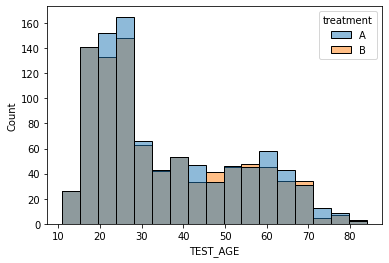

In [9]:
sns.histplot(data=twogroup, x="TEST_AGE", hue="treatment")

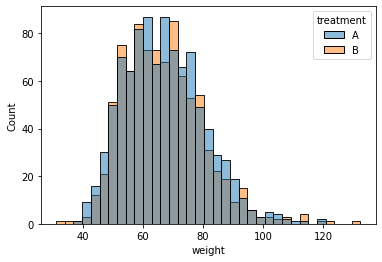

In [10]:
sns.histplot(data=twogroup, x="weight", hue="treatment")

## 검정 통계량

두 집단을 비교하는 실험에서 두 그룹에 대한 관측 데이터를 얻었다고 하면 두 잡단의 차이를 측정할 수 있는 측도를 정의해야 한다. 두 잡단의 차이를 측정할 수 있는 측도를 통계학에서는 **검정 통계량(test statistics)** 이라고 부르며 온라인 실험에서는 검정 통계량을 전역평가기준(Overall Evaluation Criterion; OEC)이라고 부른다. 

일반적으로 검정통계량 $T$ 은 두 그룹에서 얻은 평균의 차이(또는 차이의 절대값)로 정의되는 경우가 흔하다. 비율도 평균에 속하기 때문에 비율의 차이도 동일한 형식의 검정 통계량이다.

$$ T = \bar {x}_A - \bar {x}_B $$
 
 또는 

$$ T =  {p}_A - {p}_B   $$

검정통계량의 크기(절대값)가 커지면 두 그룹의 차이가 커진다는 의미이다.  




## A/B 검정 

A/B 검정은 통계학에서 두 그룹의 평균이 차이가 있는지를 비교하는 T-검정(T-test)의 다른 이름이며 
Fisher의 유의성 검정 방법으로 수행할 수 있다.

### 임상 실험 자료 

암에 대한 치료약 실험에서 나온 자료를 예제로 이용하여 분석을 하고자 한다. 3개의 처리 집단을 각각 위약(`Placebo`), 기존의 약(`Old`), 새로 개발된 약(`New`)으로 부르고 각 집단에서 20명의 환자에 대하여 치료를 수행한 뒤에 암세포의 크기를 측정하였다고 하자. 암세포의 크기가 작을 수록 치료의 효과가 있다고 할 수 있다. 

위약(placebo)은 효과가 없는 가짜 약으로서 실제 약의 유효한 치료 효과를 비교할 수 있는 **기준이 되는 집단(baseline)** 을 구성할 때 사용된다. 약 효과의 유효성을 인정받으려면 위약 집단의 효과보다 유의하게 다르다는 결과를 보여주어야 한다. 만약 임상실험에서 기준이 되는 위약 그룹이 없다면 실제 약의 효과를 입증할 증거 능력이 떨어지게 된다. 그 이유는 위약은 약의 성분이 없는 가짜 약이지만 실제로 나타나는 효과가 있기 때문에 실제 약이 위약의 효과보다 
유의하게 차이가 나지 않으면  약의 실질적인 유효한 효과가 없는 것으로 판단하기 떄문이다.    

다음은 3개의 집단에 대하여 각각 20명의 환자를 배정하여 얻은 60개의 자료를 보여주는 표이다. 60개의 자료는 csv의 형식으로 외부화일 drug.csv에 저장되어 있다

In [11]:
filename = "https://ilovedata.github.io/teaching/bigdata2/data/drug.csv"
three_drug_wide = pd.read_csv(filename, sep=',', encoding = 'utf-8-sig')

In [12]:
three_drug_wide

,Placebo,Old,New
0,31,23,23
1,28,17,17
2,34,29,11
3,36,23,11
4,33,17,9
5,27,17,16
6,39,22,16
7,25,17,14
8,23,23,17
9,29,25,18


세 처리 그룹에 대한 요약 통계량을 구해보자. 신약을 이용한 그룹의 암세포의 크기에 대한 평균이 가장 작고, 다음으로 기존의 약과 위약그룹의 순으로 나타난다.  


In [13]:
three_drug_wide.describe()

,Placebo,Old,New
count,20.000000,20.000000,20.000000
mean,31.550000,20.900000,14.850000
std,4.334379,5.990343,4.319783
min,23.000000,5.000000,7.000000
25%,28.750000,17.000000,11.000000
50%,31.500000,21.000000,15.000000
75%,34.500000,24.250000,17.000000
max,39.000000,33.000000,24.000000


데이터프레임 `three_drug` 의 데이터 형식을 넓은 데이터 형식(wide data format)이라고 부른다. 넓은 데이터 형식의 자료는 한 개의 행에 두 개 이상의 개체(record, unit)가 나타나는 자료를 말한다. 데이터프레임 `three_drug` 의 한 행에는 3명의 환자에 대한 자료가 포함되어 있다.

이러한 넓은 데이터 형식의 자료는 보기에는 좋을 수 있지만 데이터를 분석하는데 불편한 점이 많다. 따라서 한 행에 하나의 개체만 포함된 긴 데이터 형식(long data format)으로 바꾸어 주는 것이 필요하다.
넓은 형식의 자료를 긴 형식의 자료로 바꾸는 메소드는 `melt(value_vars, value_name, var_name )` 로서 3개의 인자에 대한 설명은 다음과 같다. 자새한 설명은 라이브러리 `pandas` [매뉴얼](https://pandas.pydata.org/docs/getting_started/intro_tutorials/07_reshape_table_layout.html#wide-to-long-format)에서 찾을 수 있다.

- `value_vars` : 넓은 자료의 형식을 가진 데이터프레임에서 데이터를 포함하고 있는 열이름들
- `value_name` : 긴 형식을 가진  새로운 데이터프레임에서 데이터를 포함하는 열이름
- `var_name` : 긴 형식을 가진  새로운 데이터프레임에서 `value_vars`의 열이름으로 이루어지는 새로운 열에 대한 이름

In [14]:
three_drug_long = three_drug_wide.melt(value_vars=["Placebo", "Old", "New"],
                             value_name="Value",
                             var_name="treatment")
three_drug_long

,treatment,Value
0,Placebo,31
1,Placebo,28
2,Placebo,34
3,Placebo,36
4,Placebo,33
5,Placebo,27
6,Placebo,39
7,Placebo,25
8,Placebo,23
9,Placebo,29


이제 위약 그룹과 신약 그룹의 평균이 같은 지 비교하기 위하여 두 그룹만 포함된 데이터프레임 `two_group` 을 만들자.

In [15]:
two_drug   = three_drug_long.loc[three_drug_long.treatment != "Old"].reset_index(drop=True)

In [16]:
two_drug

,treatment,Value
0,Placebo,31
1,Placebo,28
2,Placebo,34
3,Placebo,36
4,Placebo,33
5,Placebo,27
6,Placebo,39
7,Placebo,25
8,Placebo,23
9,Placebo,29


두 그룹에 대하여 암세포 크기들의 요약통계량을 구하면 다음과 같이 나타난다. 

In [17]:
two_drug.groupby(by="treatment").describe()

Value                                                
          count   mean       std   min    25%   50%   75%   max
treatment                                                      
New        20.0  14.85  4.319783   7.0  11.00  15.0  17.0  24.0
Placebo    20.0  31.55  4.334379  23.0  28.75  31.5  34.5  39.0

### 검정 통계량 

이제 두 그룹의 비교를 하기 위한 검정 통계량을 정의하자. 데이터의 형식이 연속형 변수이므로 두 그룹의 평균을 비교하는 검정 통계량 $T$를 다음과 같이 정의한다.

$$ T = \bar {x}_{Placebo} - \bar {x}_{New} $$

데이터는 암 세포의 크기이므로 그룹의 평균은 작을 수록 효과가 큰 것이다. 신약의 효과가 더 크면 $\bar {x}_{New}$이 작아진다. 따라서 두 그룹의 평균을 비교하는 검정 통계량 $T$ 가 커지는 것은 신약의 효과가 더 효과적이라는 의미이다. 

In [18]:
temp = two_drug.groupby(by="treatment").mean().reset_index()
temp

,treatment,Value
0,New,14.85
1,Placebo,31.55


In [19]:
test_stat = float(temp.loc[temp.treatment == "Placebo"].Value) - float(temp.loc[temp.treatment == "New"].Value)
test_stat

16.700000000000003

이제 두 그룹의 평균의 차이를 구하는 함수   `diff_mean` 를 만들어 보자. 

함수 `diff_mean` 는 데이터프레임 `df`를 첫 번째 인자로 받는다. 또한 두 번째 인자 `group_label` 는 데이터프레임에서 그룹을 구별할 수 있는 처리명이 저장된 열의 이름이다. 마지막 인자 `treatments` 는 비교를 하기 위한 두 개의 처리명을 리스트 형식으로 받는다.

함수를 정의할 때 함수 이름 뒤에 큰 따옴표 3개로 묶어진 부분(`"""....."""`)에 함수에 대한 설명(Docstring)을 기입할 수 있다. 이러한 방법으로 함수에 대한 설명문을 함수를 정의할 때 추가하면 물음표(?) 뒤에 함수의 이름을 넣어 실행하면 설명문이 나타난다.

In [20]:
def diff_mean(df, group_label, treatments):
    """ 
    데이터프레임을 받아서 두 그룹 평균의 차이를 계산해 주는 함수이다.
        df: 데이터프레임
        group_label : 처리명이 저장된 열이름
        treatments : 비교하고 싶은 두 개의 처리명 [A, B] (벡터 또는 리스트 형식)
    결과 : A 그룹의 평균 - B 그룹의 평균
    """
    temp = df.groupby(by=group_label).mean().reset_index()
    return float(temp.loc[temp[group_label] == treatments[0]].Value) - float(temp.loc[temp[group_label] == treatments[1]].Value)

diff_mean(two_drug, "treatment", ["Placebo", "New"])

16.700000000000003

In [21]:
?diff_mean

### 귀무가설 하에서의 분포

이제 두 그룹을 비교하는 경우 귀무가설을 생각해 보자.

- 귀무가설: 두 그룹의 분포가 같다

참고로 데이터가 이항분포를 따르는 경우 두 그룹의 성공의 분포가 같다는 가정은  "두 그룹의 성공의 확률이 같다" 는 가정과 동일하다. 

이제  위약 그룹의 분포와 신약 그룹의 분포가 같다는 귀무가설을 고려하자.  두 그룹의 분포가 같다는 것은 신약의 효과가 위약의 효과와 차이가 없다는 것이다. 두 그룹의 분포가 같다는 가정 하에서는 두 그룹의 차이는 단순한 우연에 의한 차이에 불과하다는 것이다. 

$$ \text{귀무가설:} \text{ 두 약의 효과가 같다.} $$

이제 Fisher 의 유의성 겁정 방법을 적용해 보자. **두 그룹의 분포가 같다는 가정 하에서 관측된 두 그룹의 평균의 차이 또는 더 극단적인 결과가 나오는 확률, 즉 p_값** 을 계산해야 한다.
두 그룹의 분포가 같다는 가정에서는 위약과 신약에서 나온 관측치들는 같은 분포에서 따르는 것이며 따라서 관측값의 차이는 단지 개인의 차이 또는 오차에 의한 차이일 뿐 처리 효과의 차이는 아니라는 의미이다.

### 임의순열 방법

이제 귀무가설 하에서 검정 통계량 $T$의 분포를 구해야 한다. 귀무가설 하에서 검정 통계량 $T$의 분포를 구하는 방법은 여러 가지 방법들이 있지만 우리가 지금까지 익혀온 모의실험 방법의 일종인 
임의순열 방법(random permutation method)을 사용하고자 한다. 임의순열 방법은 두 그룹을 나누는 처리를 나타내는 열 `treatment`에 있는 `Placebo` 와 `New` 를 관측한 자료에 비복원추출로 다시 임의로 배치(random assignment)한다. 재배치한 처리 그룹에 대하여 검정 통계량 $T$을 다시 계산한다. 이러한 임의 배치를 모의실험으로  여러 번  반복하여 구한 검정 통계량 $T$ 의 값들로 귀무가설하에서 검정 통계량의 분포를 근사적으로 구한다.

예를 들어 다음과 같이 처리를 나타내는 열 `treatment`에 있는 `Placebo` 와 `New`를 임의로 순서를 바꾸는 임의 재배치하는 행렬은 다음과 같이 `sample` 메소드로 구할 수 있다.

```
sample(frac=1.0, replace=False, ignore_index=True)
```
- `frac=1.0` :  전체 집단에서 표본으로 추출할 비율(fraction)을 지정하는 선택명령어이며 이 경우 모든 처리를 다시 배배치해야 하므로 `1.0`으로 지정한다.
- `replace=False`: 비복원추출오 지정한다.
- `ignore_index=True`: 재추출하는 경우 행의 원래 인덱스를 무시하고 다시 0부터 인덱스를 시작한다.

In [22]:
treatment = two_drug.treatment
treatment

0     Placebo
1     Placebo
2     Placebo
3     Placebo
4     Placebo
5     Placebo
6     Placebo
7     Placebo
8     Placebo
9     Placebo
10    Placebo
11    Placebo
12    Placebo
13    Placebo
14    Placebo
15    Placebo
16    Placebo
17    Placebo
18    Placebo
19    Placebo
20        New
21        New
22        New
23        New
24        New
25        New
26        New
27        New
28        New
29        New
30        New
31        New
32        New
33        New
34        New
35        New
36        New
37        New
38        New
39        New
Name: treatment, dtype: object

In [26]:
random_permuted_treatment = treatment.sample(frac=1.0, replace=False).reset_index(drop=True) # ignore_index=True)
random_permuted_treatment

0     Placebo
1         New
2         New
3     Placebo
4     Placebo
5         New
6         New
7     Placebo
8         New
9     Placebo
10    Placebo
11    Placebo
12    Placebo
13    Placebo
14    Placebo
15        New
16    Placebo
17    Placebo
18        New
19        New
20        New
21    Placebo
22        New
23    Placebo
24        New
25    Placebo
26    Placebo
27        New
28        New
29    Placebo
30        New
31    Placebo
32    Placebo
33        New
34        New
35        New
36    Placebo
37        New
38        New
39        New
Name: treatment, dtype: object

이제 위에서 만든 임의로 재배치한 처리 그룹의 정보를 데이터프레임 `two_drug` 에 열로 추가하자.

In [27]:
two_drug_permuted = two_drug
two_drug_permuted["permuted_treatment"] = random_permuted_treatment
two_drug_permuted

,treatment,Value,permuted_treatment
0,Placebo,31,Placebo
1,Placebo,28,New
2,Placebo,34,New
3,Placebo,36,Placebo
4,Placebo,33,Placebo
5,Placebo,27,New
6,Placebo,39,New
7,Placebo,25,Placebo
8,Placebo,23,New
9,Placebo,29,Placebo


이제 새로 임의로 재배치된 두 그룹을 나타내는 열 `permuted_treatment` 를 기준으로 검정통계량을 구해보자. 

In [28]:
diff_mean(two_drug_permuted, "permuted_treatment",["Placebo", "New"])

3.1999999999999993

이제 임의순열방법을 반복적으로 $B=5000$ 번 모의실험하여 귀무가설하에서 검정통계량의 경험적 분포를 구해보자 

In [30]:
B = 5000

test_stat_permuted = pd.DataFrame({"test_stat":np.zeros(B)})

treatment = two_drug.treatment

for i in np.arange(B): 
    random_permuted_treatment = treatment.sample(frac=1.0, replace=False).reset_index(drop=True) 
    two_drug_permuted = two_drug
    two_drug_permuted["permuted_treatment"] = random_permuted_treatment
    test_stat_permuted.loc[i, "test_stat"] = diff_mean(two_drug_permuted, "permuted_treatment", ["Placebo", "New"])

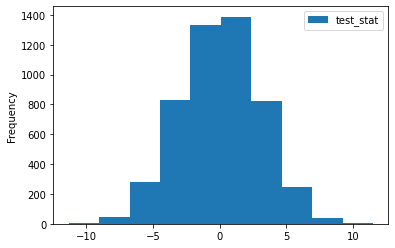

In [31]:
test_stat_permuted.plot.hist()

### 유의성 검정

이제 위에서 임의순열방법으로 구한 귀무가설 하의 검정 통계량의 분포에서 실제 관측한 검정통계량의 값과 같거나 큰 비율, 즉 p-값을 구해보자  

In [32]:
test_stat

16.700000000000003

In [33]:
p_value = np.sum(test_stat_permuted.test_stat >= test_stat)/B
p_value 

0.0

위에서 모의실험을 통해서 구한 p-값에 대한 근사값이 0.0 이다. p-값이 유의수준 0.05 보다 작으므로 귀무가설을 기각한다. 따라서 신약(`New`)은 임세포의 크기를 줄이는데 위약(`Placebo`)보다 효과적이다.

이제 신약(`New`)과 기존약(`Old`)의 효과를  반복순열 방법으로 위와 동일한 방법을 사용하여 비교해 보자.  

위애서 정의한 함수 `diff_mean`을 이용하면 신약(`New`)과 기존약(`Old`)의 평균의 차이를 쉽게 구할 수 있다.

In [34]:

test_stat_2 = diff_mean(three_drug_long, "treatment", ["Old", "New"])
test_stat_2

6.049999999999999

In [39]:
# 약(`New`)과 기존약(`Old`) 만 선택한 데이터프레임
two_drug_2 =  three_drug_long.loc[three_drug_long.treatment != "Placebo"].reset_index(drop=True)

B = 5000

test_stat_permuted_2 = pd.DataFrame({"test_stat":np.zeros(B)})

treatment_2 = two_drug_2.treatment

for i in np.arange(B): 
    random_permuted_treatment = treatment_2.sample(frac=1.0, replace=False).reset_index(drop=True) 
    two_drug_permuted = two_drug_2
    two_drug_permuted["permuted_treatment"] = random_permuted_treatment
    test_stat_permuted_2.loc[i, "test_stat"] = diff_mean(two_drug_permuted, "permuted_treatment", ["Old", "New"])

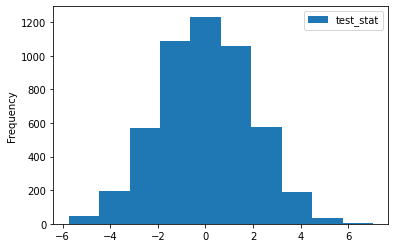

In [40]:
test_stat_permuted_2.plot.hist()

In [41]:
p_value = np.sum(test_stat_permuted_2.test_stat >= test_stat_2)/B
p_value 

0.0008

위에서 모의실험을 통해서 구한 p-값에 대한 근사값은 매우 작으며 유의수준 0.05 보다 작으므로 귀무가설을 기각한다. 따라서 신약(`New`)은 임세포의 크기를 줄이는데 기존약(`Old`)보다 효과적이다.